# Time Series - 2021 Kaggle

By Vivian Zeng

U of Notre Dame

In [273]:
import pandas as pd
from fbprophet.diagnostics import cross_validation

# Get the Data

In [274]:
%matplotlib inline

kaggle = pd.read_csv("kaggle.csv")
kaggle.head()

,Unnamed: 0,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,1,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,3,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,4,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,5,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [275]:
kaggle=kaggle.drop(kaggle.columns[0], axis=1)
kaggle.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [276]:
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171230 entries, 0 to 171229
Data columns (total 11 columns):
BusinessDate                   171230 non-null object
BranchID                       171230 non-null int64
CashOrdersReceived             171230 non-null float64
CashBalance_StartOfDay         168463 non-null float64
TotalCashUsed                  171230 non-null float64
CashToVault                    171230 non-null float64
CashUnder                      171230 non-null float64
CashOver                       171230 non-null float64
TotalCashDisbursed             171230 non-null float64
TotalCashOpeningBalance        168463 non-null float64
TotalCashReceivedAllSources    171230 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.4+ MB


In [277]:
# Convert date to a datetime object
kaggle.BusinessDate = pd.to_datetime(kaggle.BusinessDate)
kaggle.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [278]:
kaggle[['BusinessDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171230 entries, 0 to 171229
Data columns (total 1 columns):
BusinessDate    171230 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


In [279]:
# Set date to be index
kaggle.set_index('BusinessDate', inplace = True)
kaggle.index

DatetimeIndex(['2020-07-31', '2020-07-30', '2020-07-29', '2020-07-28',
               '2020-07-27', '2020-07-26', '2020-07-25', '2020-07-24',
               '2020-07-23', '2020-07-22',
               ...
               '2010-01-10', '2010-01-09', '2010-01-08', '2010-01-07',
               '2010-01-06', '2010-01-05', '2010-01-04', '2010-01-03',
               '2010-01-02', '2010-01-01'],
              dtype='datetime64[ns]', name='BusinessDate', length=171230, freq=None)

In [280]:
kaggle.head()

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


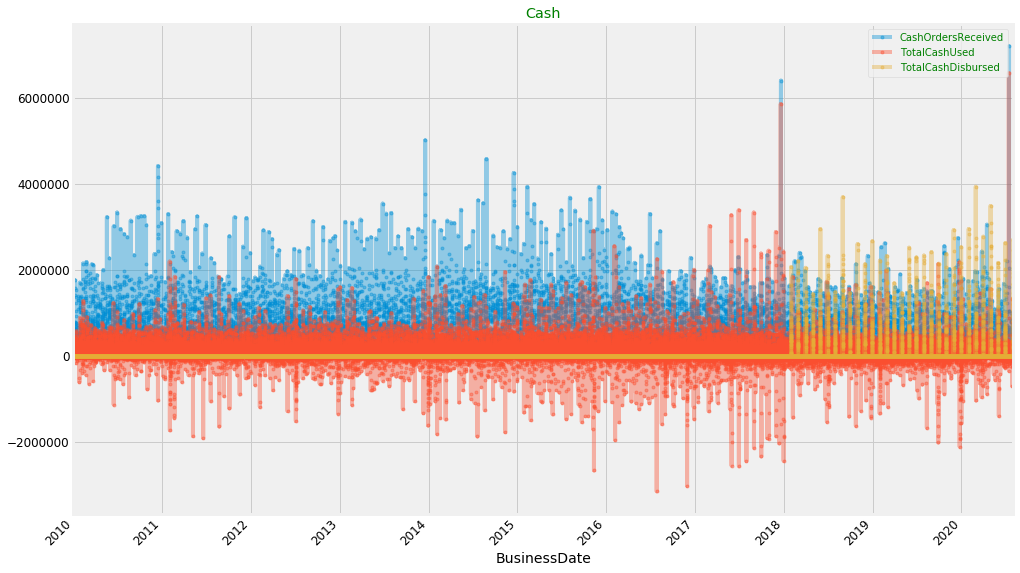

In [281]:
# Plot the some cash columns
%matplotlib inline
kaggle[['CashOrdersReceived', 
         'TotalCashUsed', 
         'TotalCashDisbursed']].plot(rot = 45, 
                                figsize = (15, 10), 
                                marker = ".", 
                                alpha = 0.4,
                                title = "Cash")

In [282]:
# Some verage monthly cash columns
#kaggle.resample('M').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [283]:
# Average CashOrdersReceived based on year
#kaggle.resample('Y').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [284]:
# Average CashOrdersReceived based on month
#kaggle.resample('M').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [285]:
# Average CashOrdersReceived based on quarter
#kaggle.resample('3M').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

# Setup train datasets

In [286]:
kaggle.head(2)

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.0,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.0,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00


# Set train based on the entire dataframe

In [287]:
# Extract data from '2019-01-01' to '2020-07-31' as train
train=kaggle.loc['2019-01-01':'2020-07-31']

In [288]:
train.head(2)

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.0,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.0,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00


In [289]:
# Reset the index to bring date in as column
train.reset_index(inplace = True)
train.head(2)

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.0,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.0,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00


In [290]:
print (train.BusinessDate.min())
print (train.BusinessDate.max())

2019-01-01 00:00:00
2020-07-31 00:00:00


In [291]:
# Extract only the variables of interest
train = train[['BusinessDate', 'BranchID','TotalCashUsed']]
train.head()

,BusinessDate,BranchID,TotalCashUsed
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [292]:
# Rename the columns as necessary
train.rename({'BusinessDate': 'ds', 'TotalCashUsed':'y'}, 
             axis = 'columns',
             inplace = True)
train.head()

,ds,BranchID,y
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [293]:
# Import Prophet
from fbprophet import Prophet
import plotly

# Create a new Prophet object
model = Prophet(yearly_seasonality=True, daily_seasonality=True)
print(model)

# Fit the model to the historical data
model.fit(train)

In [294]:
# Create DataFrame with future dates to predict at (08-01-2020 to 11-30-2020, 122 days in total)
future = model.make_future_dataframe(periods=122)
future.tail()

,ds
28369,2020-11-26
28370,2020-11-27
28371,2020-11-28
28372,2020-11-29
28373,2020-11-30


In [157]:
# Make predictions for next 122 days
#forecast = model.predict(future)
#forecast.head()

ds - the timestamps

yhat - the predictions

yhat_lower - the lower bound of the prediction interval

yhat_upper - the upper bound of the prediction interval

In [158]:
# Extract the desired components
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [159]:
# Plot the model fit and predictions
# forecast_plot = model.plot(forecast, 
                           # xlabel = 'Time', 
                           # ylabel = 'Cash')

In [160]:
#forecast['weekday_name'] = forecast['ds'].dt.day_name()
#forecast.head()

In [161]:
# Decompose the time-series into Seasonal and Non-Seasonal components
#components_plot = model.plot_components(forecast)

## Set train based on Covid time frame

In [162]:
# Extract data from '2020-01-01' to '2020-07-31' as train
train_covid=kaggle.loc['2020-01-01':'2020-07-31']

In [163]:
# Reset the index to bring date in as column
train_covid.reset_index(inplace = True)
train_covid.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [164]:
print (train_covid.BusinessDate.min())
print (train_covid.BusinessDate.max())

2020-01-01 00:00:00
2020-07-31 00:00:00


In [165]:
# Extract only the variables of interest
train_covid = train_covid[['BusinessDate', 'BranchID','TotalCashUsed']]
train_covid.head()
# Rename the columns as necessary
train_covid.rename({'BusinessDate': 'ds', 'TotalCashUsed':'y'}, 
             axis = 'columns',
             inplace = True)
train_covid.head()

,ds,BranchID,y
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [166]:
print (train_covid.ds.min())
print (train_covid.ds.max())

2020-01-01 00:00:00
2020-07-31 00:00:00


In [167]:
#from fbprophet import Prophet
#import plotly

# Create a new Prophet object
model_covid = Prophet(yearly_seasonality=True, daily_seasonality=True)
print(model_covid)

# Fit the model to the historical data
model_covid.fit(train_covid)

In [168]:
future_covid = model_covid.make_future_dataframe(periods=122)
future_covid.tail(2)

,ds
10557,2020-11-29
10558,2020-11-30


In [169]:
# Make predictions for next 122 days
#forecast_covid = model_covid.predict(future_covid)
#forecast_covid.head()

In [170]:
#print (forecast_covid.ds.min())
#print (forecast_covid.ds.max())
# Extract the desired components
# forecast_covid[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [171]:
# Extract the desired components
# forecast_covid[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [172]:
# Plot the model fit and predictions
#forecast_covid_plot = model_covid.plot(forecast_covid, 
                                       #xlabel = 'Time', 
                                       #ylabel = 'Cash')

## Compare the predicts based on train and train_covid

In [173]:
# Plot the some cash columns
#%matplotlib inline
#forecast.tail(300).yhat.plot(rot = 45, 
                                #figsize = (15, 10), 
                                #marker = ".", 
                                #alpha = 0.4,
                                #title = "Cash based on All")

In [174]:
# Plot the some cash columns
# %matplotlib inline
#forecast_covid.tail(300).yhat.plot(rot = 45, 
                                #figsize = (15, 10), 
                                #marker = ".", 
                                #alpha = 0.4,
                                #title = "Cash based on Covid")

# Dig into EDA for data during covid time frame

In [175]:
#covid=kaggle.loc['2020-01-01':'2020-07-31']

In [176]:
#kaggle.head()

In [177]:
#covid.head()

In [178]:
# Plot the some cash columns
#%matplotlib inline
#covid[['TotalCashUsed']].plot(rot = 45, 
                                #figsize = (15, 10), 
                                #marker = ".", 
                                #alpha = 0.4,
                                #title = "Cash")

In [179]:
# Some average monthly cash columns
#covid.resample('M').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [180]:
# Some average weekly cash columns
#covid.resample('W').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [181]:
# Some average 3d cash columns
#covid.resample('3d').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

# EDA for mixed pure covid and nomal train data

In [182]:
normal_covid=kaggle.loc['2019-01-01':'2020-07-31']

In [183]:
# Some average 3d cash columns
#normal_covid.resample('3d').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [184]:
# Some average week cash columns
#normal_covid.resample('w').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [185]:
# Plot the some cash columns
#%matplotlib inline
#normal_covid[['TotalCashUsed']].plot(rot = 45, 
                                #figsize = (15, 10), 
                                #marker = ".", 
                                #alpha = 0.4,
                                #title = "Cash")

# Predict based on mixed train based on normal and covid train

In [186]:
# Reset the index to bring date in as column
normal_covid.reset_index(inplace = True)
normal_covid.head()
# Extract only the variables of interest
normal_covid_train = normal_covid[['BusinessDate', 'BranchID','TotalCashUsed']]
normal_covid_train.head()

,BusinessDate,BranchID,TotalCashUsed
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [187]:
# Rename the columns as necessary
normal_covid_train.rename({'BusinessDate': 'ds', 'TotalCashUsed':'y'}, 
             axis = 'columns',
             inplace = True)
normal_covid_train.head()

,ds,BranchID,y
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [54]:
# Create a new Prophet object
model_nc = Prophet(yearly_seasonality=True, daily_seasonality=True)
print(model_nc)

# Fit the model to the historical data
model_nc.fit(normal_covid_train)

In [55]:
# Create DataFrame with future dates to predict at (08-01-2020 to 11-30-2020, 122 days in total)
future_nc = model_nc.make_future_dataframe(periods=122)
future_nc.tail(2)

,ds
28372,2020-11-29
28373,2020-11-30


In [56]:
# Make predictions for next 122 days
#forecast_nc = model_nc.predict(future_nc)
#forecast_nc.head()

In [57]:
# Plot the model fit and predictions
#forecast_plot = model_nc.plot(forecast_nc, 
                           #xlabel = 'Time', 
                           #ylabel = 'Cash')

In [58]:
# Plot the some cash columns
#%matplotlib inline
#forecast_nc.tail(300).yhat.plot(rot = 45, 
                                #figsize = (15, 10), 
                                #marker = ".", 
                                #alpha = 0.4,
                                #title = "Cash based on mixture of covid and normal")

In [59]:
# Plot the some cash columns
#%matplotlib inline
#forecast.tail(300).yhat.plot(rot = 45, 
                                #figsize = (15, 10), 
                                #marker = ".", 
                                #alpha = 0.4,
                                #title = "Cash based on All")

In [60]:
#forecast.yhat.describe()

In [61]:
#forecast_nc.yhat.describe()

# Forcasting based on BranchID

## Train based on entire time frame

In [62]:
df = train.groupby('BranchID').filter(lambda x: len(x) > 2)

df.BranchID = df.BranchID.astype(str)

final = pd.DataFrame(columns=['BranchID','ds','yhat'])

grouped = df.groupby('BranchID')
for g in grouped.groups:
    group = grouped.get_group(g)
    m = Prophet(yearly_seasonality=True, daily_seasonality=True)
    m.fit(group)
    future = m.make_future_dataframe(periods=122)
    forecast = m.predict(future)
    #I added a column with BranchID id
    forecast['BranchID'] = g
    #I used concat instead of merge
    final = pd.concat([final, forecast], ignore_index=True)

final.head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,BranchID,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,ds,multiplicative_terms,multiplicative_terms_lower,...,trend_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat,yhat_lower,yhat_upper
0,108,37416.669224,37416.669224,37416.669224,67670.607274,67670.607274,67670.607274,2010-01-01,0.0,0.0,...,41049.577185,-11124.031256,-11124.031256,-11124.031256,-19129.906794,-19129.906794,-19129.906794,78466.246409,-68319.349783,226507.397637
1,108,-42906.745599,-42906.745599,-42906.745599,67670.607274,67670.607274,67670.607274,2010-01-02,0.0,0.0,...,41039.221181,-88852.594690,-88852.594690,-88852.594690,-21724.758183,-21724.758183,-21724.758183,-1867.524418,-138166.276710,144982.305428
2,108,8487.982458,8487.982458,8487.982458,67670.607274,67670.607274,67670.607274,2010-01-03,0.0,0.0,...,41028.865178,-35204.279721,-35204.279721,-35204.279721,-23978.345095,-23978.345095,-23978.345095,49516.847635,-88721.998604,191879.981765
3,108,12556.630730,12556.630730,12556.630730,67670.607274,67670.607274,67670.607274,2010-01-04,0.0,0.0,...,41018.509174,-29248.435081,-29248.435081,-29248.435081,-25865.541463,-25865.541463,-25865.541463,53575.139904,-79864.249055,208841.596316
4,108,72794.050919,72794.050919,72794.050919,67670.607274,67670.607274,67670.607274,2010-01-05,0.0,0.0,...,41008.153171,32493.093467,32493.093467,32493.093467,-27369.649822,-27369.649822,-27369.649822,113802.204090,-39780.917465,252158.014013
5,108,49226.883820,49226.883820,49226.883820,67670.607274,67670.607274,67670.607274,2010-01-06,0.0,0.0,...,40997.797167,10038.812714,10038.812714,10038.812714,-28482.536168,-28482.536168,-28482.536168,90224.680987,-52607.692568,238251.866059
6,108,160363.492525,160363.492525,160363.492525,67670.607274,67670.607274,67670.607274,2010-01-07,0.0,0.0,...,40987.441163,121897.434566,121897.434566,121897.434566,-29204.549315,-29204.549315,-29204.549315,201350.933688,59807.767315,337451.958165
7,108,27002.345359,27002.345359,27002.345359,67670.607274,67670.607274,67670.607274,2010-01-08,0.0,0.0,...,40977.085160,-11124.031256,-11124.031256,-11124.031256,-29544.230659,-29544.230659,-29544.230659,67979.430519,-77409.797439,210527.488204
8,108,-50699.813188,-50699.813188,-50699.813188,67670.607274,67670.607274,67670.607274,2010-01-09,0.0,0.0,...,40966.729156,-88852.594690,-88852.594690,-88852.594690,-29517.825771,-29517.825771,-29517.825771,-9733.084031,-158177.121943,140694.583474
9,108,3317.713231,3317.713231,3317.713231,67670.607274,67670.607274,67670.607274,2010-01-10,0.0,0.0,...,40956.373153,-35204.279720,-35204.279720,-35204.279720,-29148.614322,-29148.614322,-29148.614322,44274.086384,-93580.560310,177050.172754


In [63]:
print (final.ds.min())
print (final.ds.max())

2010-01-01 00:00:00
2020-11-30 00:00:00


In [64]:
final.shape

(177208, 23)

In [65]:
final['future']=0
final.head()

,BranchID,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,ds,multiplicative_terms,multiplicative_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat,yhat_lower,yhat_upper,future
0,108,37416.669224,37416.669224,37416.669224,67670.607274,67670.607274,67670.607274,2010-01-01,0.0,0.0,...,-11124.031256,-11124.031256,-11124.031256,-19129.906794,-19129.906794,-19129.906794,78466.246409,-68319.349783,226507.397637,0
1,108,-42906.745599,-42906.745599,-42906.745599,67670.607274,67670.607274,67670.607274,2010-01-02,0.0,0.0,...,-88852.594690,-88852.594690,-88852.594690,-21724.758183,-21724.758183,-21724.758183,-1867.524418,-138166.276710,144982.305428,0
2,108,8487.982458,8487.982458,8487.982458,67670.607274,67670.607274,67670.607274,2010-01-03,0.0,0.0,...,-35204.279721,-35204.279721,-35204.279721,-23978.345095,-23978.345095,-23978.345095,49516.847635,-88721.998604,191879.981765,0
3,108,12556.630730,12556.630730,12556.630730,67670.607274,67670.607274,67670.607274,2010-01-04,0.0,0.0,...,-29248.435081,-29248.435081,-29248.435081,-25865.541463,-25865.541463,-25865.541463,53575.139904,-79864.249055,208841.596316,0
4,108,72794.050919,72794.050919,72794.050919,67670.607274,67670.607274,67670.607274,2010-01-05,0.0,0.0,...,32493.093467,32493.093467,32493.093467,-27369.649822,-27369.649822,-27369.649822,113802.204090,-39780.917465,252158.014013,0


In [66]:
final.iloc[-122:,].future=1

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [67]:
#Extract the desired components
final[['BranchID', 'ds', 'yhat', 'yhat_lower', 'yhat_upper', 'future']].tail()

,BranchID,ds,yhat,yhat_lower,yhat_upper,future
177203,99,2020-11-26,183791.654755,71621.866782,299326.060943,1
177204,99,2020-11-27,59516.918597,-57050.906850,166281.647051,1
177205,99,2020-11-28,191.546763,-110732.757261,119945.947371,1
177206,99,2020-11-29,18585.598883,-91661.137464,138189.697705,1
177207,99,2020-11-30,48367.037126,-66155.919720,163123.852297,1


In [68]:
len(final.BranchID.unique())

49

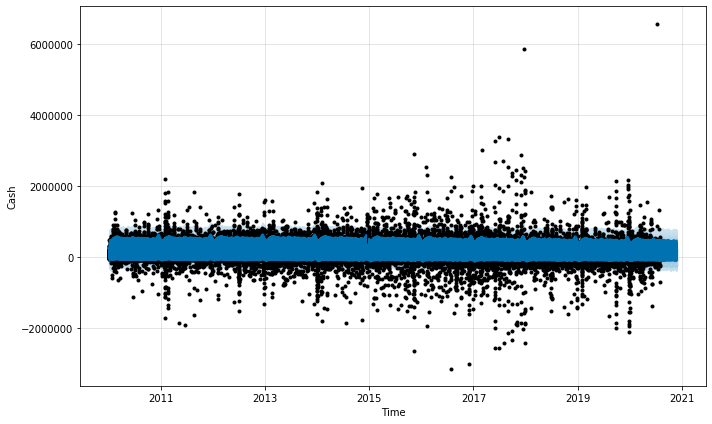

In [69]:
forecast_plot = model.plot(final,
                           xlabel = 'Time', 
                           ylabel = 'Cash')

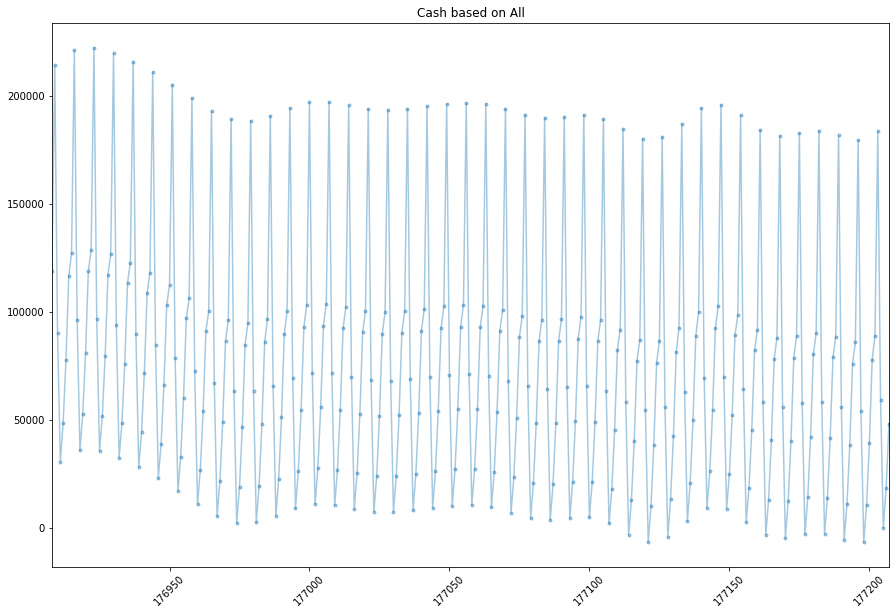

In [70]:
%matplotlib inline
final.tail(300).yhat.plot(rot = 45, 
                          figsize = (15, 10),
                          marker = ".",
                          alpha = 0.4,
                          title = "Cash based on All")

In [71]:
from matplotlib import pyplot as plt

In [72]:
#fig = plt.figure(figsize=(15,10))
#fig.set_dpi(300)

#present_data = final.loc[final['future'] == 0]
#future_data = final.loc[final['future'] == 1]

#present_data.groupby('BranchID')['yhat'].plot(legend='True')
#future_data.groupby('BranchID')['yhat'].plot(style='--')

#plt.legend(loc='center left', ncol=5, bbox_to_anchor=(1, 0.5), fancybox=True)
#plt.show()

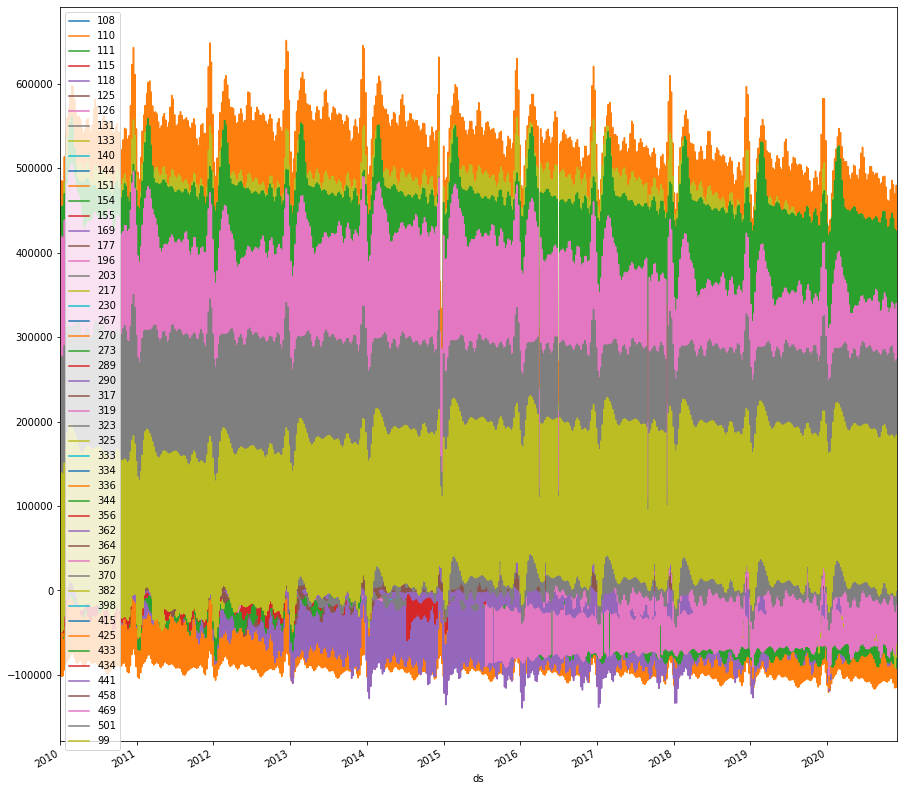

In [73]:
fig, ax = plt.subplots(figsize=(15,15))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for key, data in final.groupby('BranchID'):
    data.plot(x='ds', y='yhat', ax=ax, label=key)
    

In [74]:
final.groupby('BranchID').yhat.describe()

,count,mean,std,min,25%,50%,75%,max
BranchID,,,,,,,,
108,3948.0,88748.064487,62875.839039,-45930.350109,50891.265446,79112.276946,116160.755771,254923.317741
110,3951.0,41019.204493,78337.686028,-120639.013418,4002.812606,33457.125517,122321.530775,184877.109940
111,3948.0,70174.361659,75766.100614,-56352.277798,14255.394999,46787.182795,108534.976384,263074.210759
115,3948.0,64610.061180,58317.535350,-35223.662120,31099.528509,53242.997235,70689.421627,221115.388855
118,3959.0,73344.975039,103331.520877,-139338.125182,8094.509338,64817.282720,111889.672780,388633.658433
125,3112.0,87021.232546,70941.582707,-54357.069806,44890.688580,68817.136192,121819.069767,274675.804036
126,2840.0,12262.571140,13393.778990,-14912.373988,2924.649224,12236.819878,19515.340421,42405.554885
131,3948.0,35713.249945,27828.511484,-28331.225563,16758.675046,32373.364910,48919.428214,116281.105366
133,3948.0,66460.534586,52000.812147,-37140.383929,37028.484657,55266.067339,82802.702936,216083.019734


In [75]:
#pip install jupytext --upgrade

In [76]:
#####

In [77]:
final.to_csv('kaggle_ver1', index=False)

In [78]:
final.shape

(177208, 24)

In [79]:
177208-171230

5978

In [80]:
output = final[['ds', 'BranchID','yhat']]

In [81]:
output.head()

,ds,BranchID,yhat
0,2010-01-01,108,78466.246409
1,2010-01-02,108,-1867.524418
2,2010-01-03,108,49516.847635
3,2010-01-04,108,53575.139904
4,2010-01-05,108,113802.204090


In [82]:
output=output.tail(122*49)

In [83]:
output.head()

,ds,BranchID,yhat
171230,2015-04-10,501,88286.136269
171231,2015-04-11,501,-3245.059455
171232,2015-04-12,501,23433.068965
171233,2015-04-13,501,43718.260697
171234,2015-04-14,501,95778.359916


In [84]:
#output.head()

In [86]:
#output['Date_Branch'] = output[['yhat', 'BranchID']].agg('-'.join, axis=1)

In [87]:
output.head()

,ds,BranchID,yhat
171230,2015-04-10,501,88286.136269
171231,2015-04-11,501,-3245.059455
171232,2015-04-12,501,23433.068965
171233,2015-04-13,501,43718.260697
171234,2015-04-14,501,95778.359916


# Smooth

In [188]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook


%matplotlib inline

In [189]:
train.head()

,ds,BranchID,y
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [190]:
kaggle.head()

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


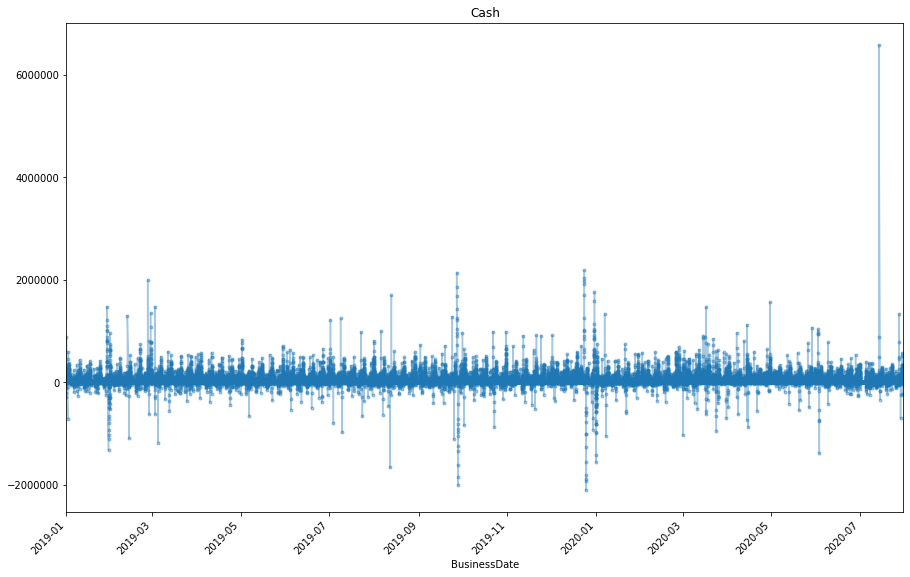

In [193]:
%matplotlib inline
kaggle.loc['2019-01-01':'2020-07-31'].TotalCashUsed.plot(rot = 45, 
                                figsize = (15, 10), 
                                marker = ".", 
                                alpha = 0.4,
                                title = "Cash")

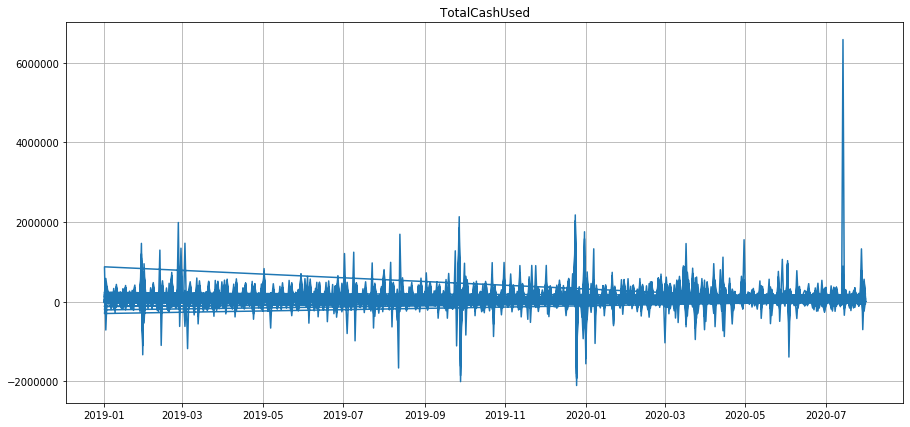

In [200]:
plt.figure(figsize=(15, 7))
plt.plot(kaggle.loc['2019-01-01':'2020-07-31'].TotalCashUsed)
plt.title('TotalCashUsed')
plt.grid(True)
plt.show()

# Forecast quality metrics

R squared: coefficient of determination (in econometrics, this can be interpreted as the percentage of variance explained by the model),  (−∞,1]

R2=1−SS(res)/SS(tot)

In [ ]:
#sklearn.metrics.r2_score

Mean Absolute Error: this is an interpretable metric because it has the same unit of measurment as the initial series,  [0,+∞) 

MAE=SUM(|yi-yi^|)/n

In [ ]:
#sklearn.metrics.mean_absolute_error

Median Absolute Error: again, an interpretable metric that is particularly interesting because it is robust to outliers,  [0,+∞) 

MedAE=median(|y1−ŷ1|,...,|yn−ŷn|)

In [ ]:
#sklearn.metrics.median_absolute_error

Mean Squared Error: the most commonly used metric that gives a higher penalty to large errors and vice versa,  [0,+∞)

MSE=1/n∑(yi−ŷi)2

In [ ]:
#sklearn.metrics.mean_squared_error

Mean Squared Logarithmic Error: practically, this is the same as MSE, but we take the logarithm of the series. As a result, we give more weight to small mistakes as well. This is usually used when the data has exponential trends,  [0,+∞)

MSLE=1/n∑(log(1+yi)−log(1+ŷi))2

In [ ]:
#sklearn.metrics.mean_squared_log_error

Mean Absolute Percentage Error: this is the same as MAE but is computed as a percentage, which is very convenient when you want to explain the quality of the model to management,  [0,+∞) 


MAPE=100/n∑(|yi−ŷi|/yi)

In [ ]:
# def mean_absolute_percentage_error(y_true, y_pred): 
    #return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [194]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Move, smoothe, evaluate

Simple hypothesis: "Total cash used tomorrow will be the same as today". However, instead of a model like
ŷt=yt−1  (which is actually a great baseline for any time series prediction problems and sometimes is impossible to beat), we will assume that the future value of our variable depends on the average of its  k  previous values. Therefore, we will use the moving average.

Moving Average:

ŷt=(1/k)(∑yt−n)

In [195]:
# def moving_average(series, n):
#     """
#         Calculate average of last n observations
#     """
#     return np.average(series[-n:])

# print(moving_average(kaggle, 8760)) # prediction for the last observed year (past 8760 hours or a year)
# print(moving_average(kaggle, 24)) # prediction for the last observed day (past 24 hours/a day)
# print(moving_average(kaggle, 720)) # prediction for the last observed day (30 days)
# print(moving_average(kaggle, 15000)) # prediction for the 15000 observed hour 
# #(try to get past 8760 hours or 3865 days in train, but the maxmium seems 15000)
# # averave based on 30 days is close to the total average

420742.1416583333
432138.66612500005
332095.33119166666
305006.69539753336


Unfortunately, we cannot make predictions far in the future -- in order to get the value for the next step, we need the previous values to be actually observed. But moving average has another use case - smoothing the original time series to identify trends. Pandas has an implementation available with DataFrame.rolling(window).mean(). The wider the window, the smoother the trend. 

In the case of very noisy data, which is often encountered in finance, this procedure can help detect common patterns.

In [115]:
# def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

#     """
#         series - dataframe with timeseries
#         window - rolling window size 
#         plot_intervals - show confidence intervals
#         plot_anomalies - show anomalies 

#     """
#     rolling_mean = series.rolling(window=window).mean()

#     plt.figure(figsize=(15,5))
#     plt.title("Moving average\n window size = {}".format(window))
#     plt.plot(rolling_mean, "g", label="Rolling mean trend")

#     # Plot confidence intervals for smoothed values
#     if plot_intervals:
#         mae = mean_absolute_error(series[window:], rolling_mean[window:])
#         deviation = np.std(series[window:] - rolling_mean[window:])
#         lower_bond = rolling_mean - (mae + scale * deviation)
#         upper_bond = rolling_mean + (mae + scale * deviation)
#         plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
#         plt.plot(lower_bond, "r--")
        
#         # Having the intervals, find abnormal values
#         if plot_anomalies:
#             anomalies = pd.DataFrame(index=series.index, columns=series.columns)
#             anomalies[series<lower_bond] = series[series<lower_bond]
#             anomalies[series>upper_bond] = series[series>upper_bond]
#             plt.plot(anomalies, "ro", markersize=10)
        
#     plt.plot(series[window:], label="Actual values")
#     plt.legend(loc="upper left")
#     plt.grid(True)

Smooth by the previous 7 days.

In [258]:
# 7days smooth
#train1=plotMovingAverage(kaggle.loc['2010-01-01':'2020-07-31'].TotalCashUsed, 168) 

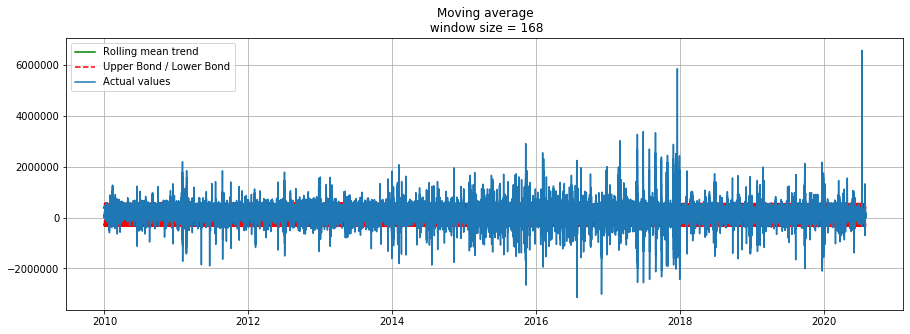

In [128]:
plotMovingAverage(kaggle.loc['2010-01-01':'2020-07-31'].TotalCashUsed, 168, plot_intervals=True)

Now, let's create a simple anomaly detection system with the help of moving average. 

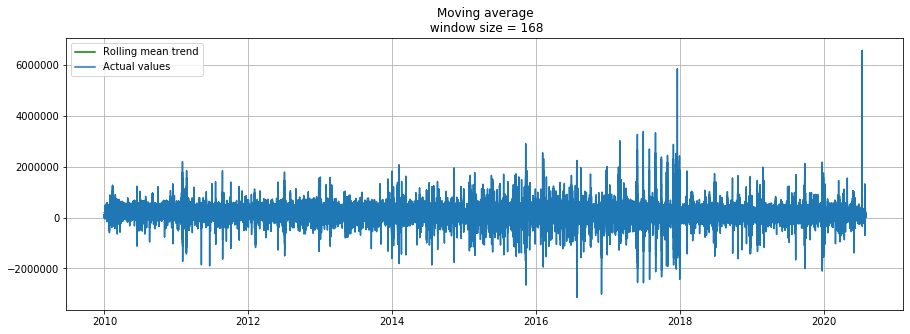

In [129]:
plotMovingAverage(kaggle.loc['2010-01-01':'2020-07-31'].TotalCashUsed, 168, plot_anomalies=True)

Weighted average is a simple modification to the moving average. The weights sum up to 1 with larger weights assigned to more recent observations.

ŷt=∑(ωn*yt+1−n)

In [131]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

# SMOOTH

Single Exponential Smoothing

In [1]:

# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# prepare data
data = train
# create class
model = SimpleExpSmoothing(data)
# fit model
train1 = model.fit(train)
# make prediction
#yhat = model_fit.predict(...)


In [ ]:
train1.head()

In [214]:
from statsmodels.tsa.stattools import adfuller
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

In [211]:
test_result=adfuller(kaggle.loc['2019-01-01':'2020-07-31'].TotalCashUsed)

In [212]:
test_result[1] <= 0.05

True

In [220]:
#kaggle.head()

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [210]:
def adfuller_test(TotalCashUsed):
    result=adfuller(TotalCashUsed)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
        else:
            print("weak evidence against null hypothesis,indicating it is non-stationary ")
adfuller_test(kaggle.loc['2019-01-01':'2020-07-31'].TotalCashUsed)

ADF Test Statistic : -7.729935046368197
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
p-value : 1.132465328476278e-11
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
#Lags Used : 50
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
Number of Observations : 28201
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [226]:
train1=kaggle.loc['2019-01-01':'2020-07-31'][['TotalCashUsed']]

In [227]:
train1.head()

,TotalCashUsed
BusinessDate,
2020-07-31,-43718.13
2020-07-30,261410.14
2020-07-29,104922.70
2020-07-28,124024.48
2020-07-27,59077.37


In [223]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 18, 8
#decomposition = sm.tsa.seasonal_decompose(kaggle.loc['2019-01-01':'2020-07-31'].dropna(), model='additive')
#fig = decomposition.plot()
#plt.show()

In [215]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [232]:
# mod2 = sm.tsa.statespace.SARIMAX(train1,order=(2,2,2),seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)
# results2 = mod2.fit()
# print('ARIMA{}x{}12 - AIC:{}'.format((2,2,2),(1,1,1,12),results2.aic))

In [228]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        #try:
            mod = sm.tsa.statespace.SARIMAX(train1,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        #except: 
            #continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:752171.6048773665
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:750951.5441402665
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:765211.5659240586
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:748112.7813234994
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:750757.7699208275
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:747089.2395858719
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:757831.2117648022
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:747951.0306681509
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:752078.6727485539
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:750926.9715716195
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:764123.4650078436
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:750602.987944062
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:750775.2799046414
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:746749.092718716
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:757778.2812463767
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:750601.364264523
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:770073.4486873852
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:769752.9592216627
ARIMA(0, 1, 0

In [230]:
mod = sm.tsa.statespace.SARIMAX(train1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2149      0.002    -99.038      0.000      -0.219      -0.211
ma.L1         -0.9717      0.001   -647.913      0.000      -0.975      -0.969
ar.S.L12       0.5224      0.055      9.521      0.000       0.415       0.630
ma.S.L12      -0.5989      0.053    -11.215      0.000      -0.704      -0.494
sigma2      2.209e+10   2.87e-11    7.7e+20      0.000    2.21e+10    2.21e+10


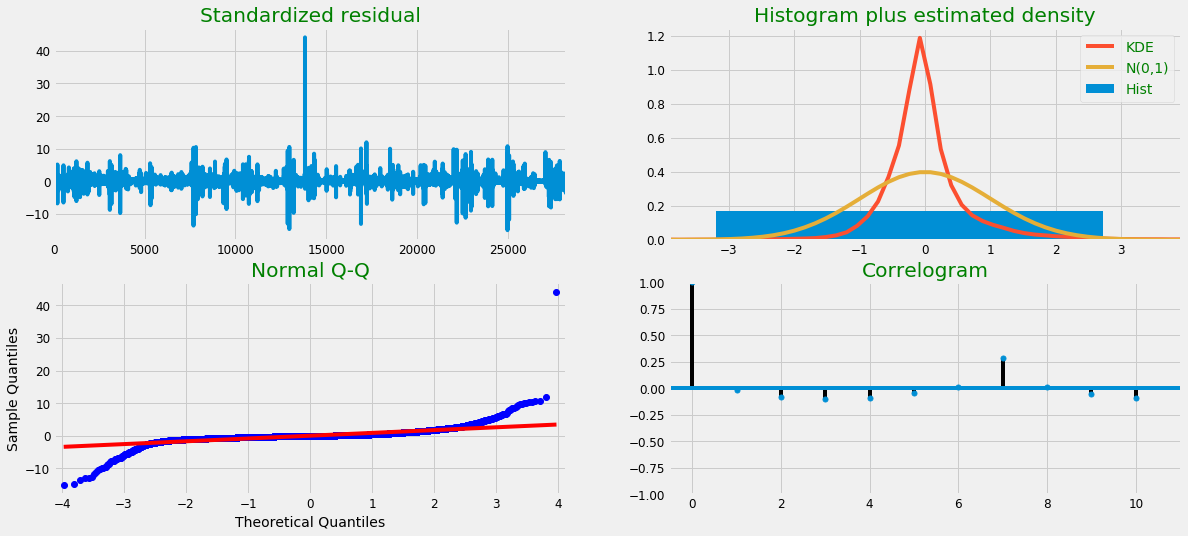

In [233]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [253]:
train1.shape

(28252, 1)

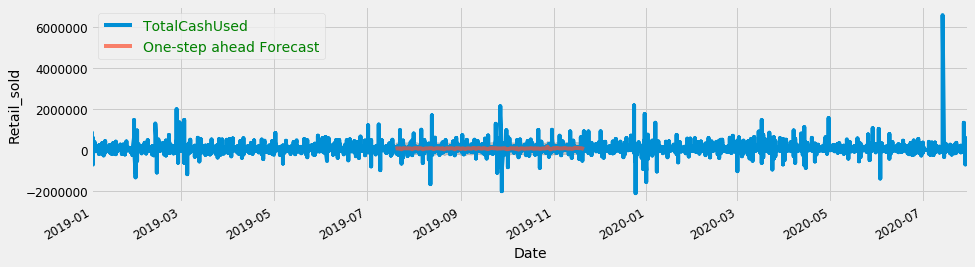

In [257]:
pred = results.get_prediction(start=252, end=375, dynamic=False)
pred_ci = pred.conf_int()
ax = train1['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [244]:
results

# Time series cross validation

Now, knowing how to set up cross-validation, we can find the optimal parameters for the Holt-Winters model. Recall that we have daily seasonality in ads, hence the slen=24 parameter.

In [ ]:
# from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

# def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
#     """
#         Returns error on CV  
        
#         params - vector of parameters for optimization
#         series - dataset with timeseries
#         slen - season length for Holt-Winters model
#     """
#     # errors array
#     errors = []
    
#     values = series.values
#     alpha, beta, gamma = params
    
#     # set the number of folds for cross-validation
#     tscv = TimeSeriesSplit(n_splits=3) 
    
#     # iterating over folds, train model on each, forecast and calculate error
#     for train, test in tscv.split(values):

#         model = HoltWinters(series=values[train], slen=slen, 
#                             alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
#         model.triple_exponential_smoothing()
        
#         predictions = model.result[-len(test):]
#         actual = values[test]
#         error = loss_function(predictions, actual)
#         errors.append(error)
        
#     return np.mean(np.array(errors))

In the Holt-Winters model, as well as in the other models of exponential smoothing, there's a constraint on how large the smoothing parameters can be, each of them ranging from 0 to 1. Therefore, in order to minimize our loss function, we have to choose an algorithm that supports constraints on model parameters. In our case, we will use the truncated Newton conjugate gradient.

In [134]:
# class HoltWinters:
    
#     """
#     Holt-Winters model with the anomalies detection using Brutlag method
    
#     # series - initial time series
#     # slen - length of a season
#     # alpha, beta, gamma - Holt-Winters model coefficients
#     # n_preds - predictions horizon
#     # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
#     """
    
    
#     def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
#         self.series = series
#         self.slen = slen
#         self.alpha = alpha
#         self.beta = beta
#         self.gamma = gamma
#         self.n_preds = n_preds
#         self.scaling_factor = scaling_factor
        
        
#     def initial_trend(self):
#         sum = 0.0
#         for i in range(self.slen):
#             sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
#         return sum / self.slen  
    
#     def initial_seasonal_components(self):
#         seasonals = {}
#         season_averages = []
#         n_seasons = int(len(self.series)/self.slen)
#         # let's calculate season averages
#         for j in range(n_seasons):
#             season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
#         # let's calculate initial values
#         for i in range(self.slen):
#             sum_of_vals_over_avg = 0.0
#             for j in range(n_seasons):
#                 sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
#             seasonals[i] = sum_of_vals_over_avg/n_seasons
#         return seasonals   

          
#     def triple_exponential_smoothing(self):
#         self.result = []
#         self.Smooth = []
#         self.Season = []
#         self.Trend = []
#         self.PredictedDeviation = []
#         self.UpperBond = []
#         self.LowerBond = []
        
#         seasonals = self.initial_seasonal_components()
        
#         for i in range(len(self.series)+self.n_preds):
#             if i == 0: # components initialization
#                 smooth = self.series[0]
#                 trend = self.initial_trend()
#                 self.result.append(self.series[0])
#                 self.Smooth.append(smooth)
#                 self.Trend.append(trend)
#                 self.Season.append(seasonals[i%self.slen])
                
#                 self.PredictedDeviation.append(0)
                
#                 self.UpperBond.append(self.result[0] + 
#                                       self.scaling_factor * 
#                                       self.PredictedDeviation[0])
                
#                 self.LowerBond.append(self.result[0] - 
#                                       self.scaling_factor * 
#                                       self.PredictedDeviation[0])
#                 continue
                
#             if i >= len(self.series): # predicting
#                 m = i - len(self.series) + 1
#                 self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
#                 # when predicting we increase uncertainty on each step
#                 self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
#             else:
#                 val = self.series[i]
#                 last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
#                 trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
#                 seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
#                 self.result.append(smooth+trend+seasonals[i%self.slen])
                
#                 # Deviation is calculated according to Brutlag algorithm.
#                 self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
#                                                + (1-self.gamma)*self.PredictedDeviation[-1])
                     
#             self.UpperBond.append(self.result[-1] + 
#                                   self.scaling_factor * 
#                                   self.PredictedDeviation[-1])

#             self.LowerBond.append(self.result[-1] - 
#                                   self.scaling_factor * 
#                                   self.PredictedDeviation[-1])

#             self.Smooth.append(smooth)
#             self.Trend.append(trend)
#             self.Season.append(seasonals[i%self.slen])

In [2]:
# %%time
# data = train.y[:-20] # leave some data for testing

# # initializing model parameters alpha, beta and gamma
# x = [0, 0, 0] 

# # Minimizing the loss function 
# opt = minimize(timeseriesCVscore, x0=x, 
#                args=(data, mean_squared_log_error), 
#                method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
#               )

# # Take optimal values...
# alpha_final, beta_final, gamma_final = opt.x
# print(alpha_final, beta_final, gamma_final)

# # ...and train the model with them, forecasting for the next 2928 hours
# model = HoltWinters(data, slen = 24, 
#                     alpha = alpha_final, 
#                     beta = beta_final, 
#                     gamma = gamma_final, 
#                     n_preds = 2928, scaling_factor = 3)
# model.triple_exponential_smoothing()